Dataset used in this project / notebook can be found on Kaggle webiste (https://www.kaggle.com/c/titanic/data).

In [244]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [245]:
titanic_dataset = pd.read_csv("titanic.csv")

In [246]:
titanic_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Preprocessing

    1. Create new dataframe with colums that will determine clusters
    2. Encode Sex colum to 0 and 1
    3. Use PCA for dimensionality reduction, so we can plot datapoints easily
    
As you can see there is one column called Age which is not in  the same scale as the rest of our data, BUT because we are use PCA everything will be on the same scale.


### Creating new dataframe

In [247]:
set_to_use = titanic_dataset
set_to_use = set_to_use.drop('Name', axis=1)
set_to_use = set_to_use.drop('Ticket', axis=1)
set_to_use = set_to_use.drop('Fare', axis=1)
set_to_use = set_to_use.drop('Embarked', axis=1)
set_to_use.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,1,0,3,male,22.0,1,0,NaN
1,2,1,1,female,38.0,1,0,C85
2,3,1,3,female,26.0,0,0,NaN
3,4,1,1,female,35.0,1,0,C123
4,5,0,3,male,35.0,0,0,NaN


In [248]:
set_to_use.fillna(0, inplace=True)

In [249]:
set_to_use.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,1,0,3,male,22.0,1,0,0
1,2,1,1,female,38.0,1,0,C85
2,3,1,3,female,26.0,0,0,0
3,4,1,1,female,35.0,1,0,C123
4,5,0,3,male,35.0,0,0,0


### Encoding Sex column using LabelEncoder

In [250]:
from sklearn.preprocessing import LabelEncoder

In [251]:
encoder = LabelEncoder()
encoded_sex = encoder.fit_transform(set_to_use.iloc[:, 3])

In [252]:
set_to_use['Sex'] = encoded_sex

In [253]:
set_to_use.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,1,0,3,1,22.0,1,0,0
1,2,1,1,0,38.0,1,0,C85
2,3,1,3,0,26.0,0,0,0
3,4,1,1,0,35.0,1,0,C123
4,5,0,3,1,35.0,0,0,0


In [254]:
features = set_to_use.iloc[:, 1:-1].values

In [255]:
print(features)

[[ 0.  3.  1. 22.  1.  0.]
 [ 1.  1.  0. 38.  1.  0.]
 [ 1.  3.  0. 26.  0.  0.]
 ...
 [ 0.  3.  0.  0.  1.  2.]
 [ 1.  1.  1. 26.  0.  0.]
 [ 0.  3.  1. 32.  0.  0.]]


### Using Principal Component Analysis for dimensionality reduction

In [256]:
from sklearn.decomposition import PCA

In [257]:
titanic_pca = PCA(n_components=4)
titanic_pca.fit(features)
test = titanic_pca.transform(features)

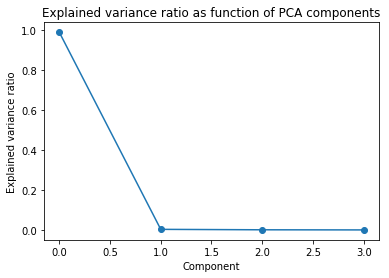

In [258]:
plt.plot(list(titanic_pca.explained_variance_ratio_),'-o')
plt.title('Explained variance ratio as function of PCA components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()

This PCA above with 4 components was for testing. We will need 2 components for 2D plotting, also for every clustering algorithm wa are going to use reduced_features with 2 features.

In [259]:
reduction_pca = PCA(n_components=2)
reduced_features = reduction_pca.fit_transform(features)

## Clustering

Firstly we are going to use SKlearn version of KMeans

In [260]:
from sklearn.cluster import KMeans

Starting with version of 5 clusters.

In [261]:
km = KMeans(n_clusters=5)
clusters = km.fit(reduced_features)

In [262]:
clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

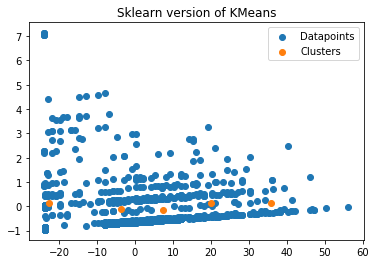

In [263]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], label='Datapoints')
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

In [264]:
reduced_features.shape

(891, 2)

In [265]:
clusters.cluster_centers_

array([[ -3.55585101,  -0.10161391],
       [ 20.04395507,   0.15032982],
       [-22.6707669 ,   0.13760433],
       [  7.26957844,  -0.16324169],
       [ 35.87681137,   0.13957946]])

### (Optional) Using custom KMeans

In [266]:
from kmeans_numpy import *

In [267]:
kmm = KMeans_numpy(n_clusters=5, tolerance=0.00001)

In [268]:
clusters, clustered_data = kmm.fit(reduced_features)

In [269]:
clusters = np.array(clusters)

I have improved this version of KMeans so we can easily plot datapoints in clusters and to inspect that data.

In [270]:
cluster_one_data = np.array(clustered_data[0])
cluster_two_data = np.array(clustered_data[1])
cluster_three_data = np.array(clustered_data[2])
cluster_four_data = np.array(clustered_data[3])
cluster_five_data = np.array(clustered_data[4])

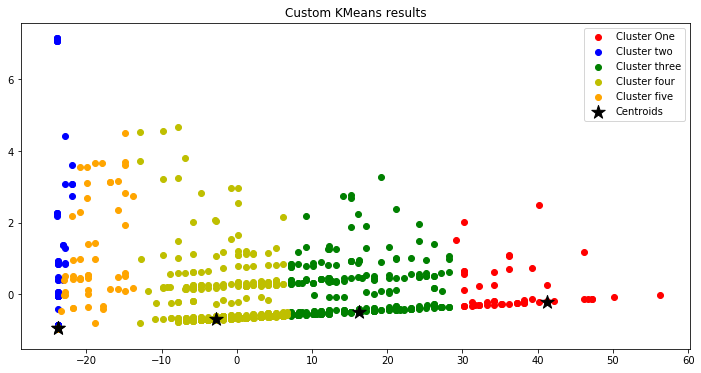

In [271]:
plt.figure(figsize=(12, 6))
plt.scatter(cluster_one_data[:, 0], cluster_one_data[:, 1], c='r', label='Cluster One')
plt.scatter(cluster_two_data[:, 0], cluster_two_data[:, 1], c='b', label='Cluster two')
plt.scatter(cluster_three_data[:, 0], cluster_three_data[:, 1], c='g', label='Cluster three')
plt.scatter(cluster_four_data[:, 0], cluster_four_data[:, 1], c='y', label='Cluster four')
plt.scatter(cluster_five_data[:, 0], cluster_five_data[:, 1], color='orange', label='Cluster five')
plt.scatter(clusters[:, 0], clusters[:, 1], marker='*', s=200, color='black', label='Centroids')
plt.title("Custom KMeans results")
plt.legend()
plt.show()

Let's experiment and see how custom KMeans is working with less numbers of clusters. In this way we can determine optimal number of clusters.

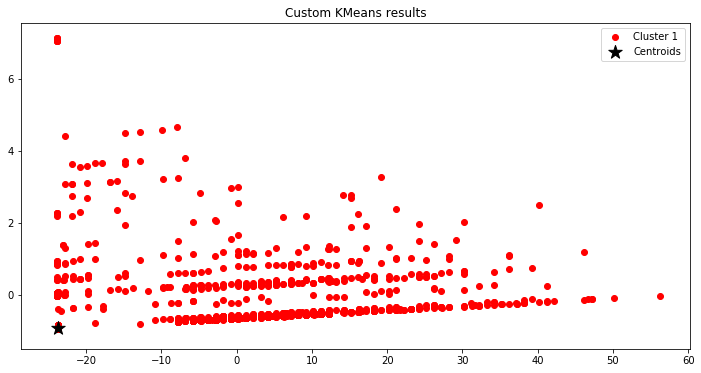

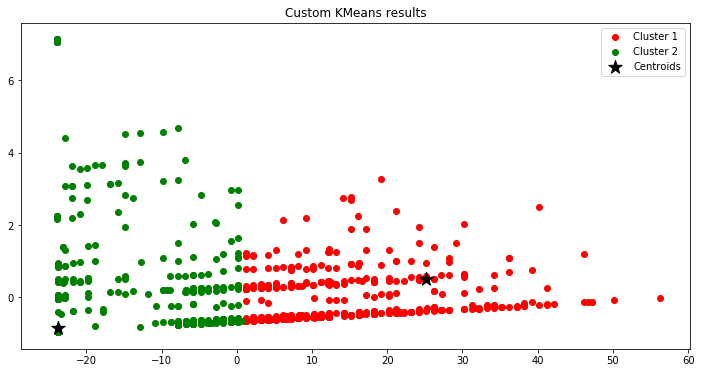

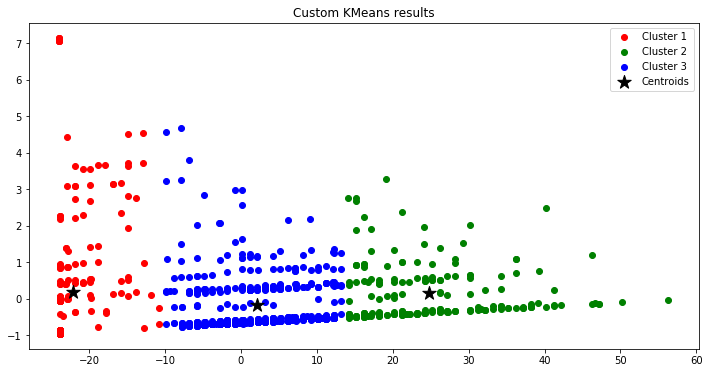

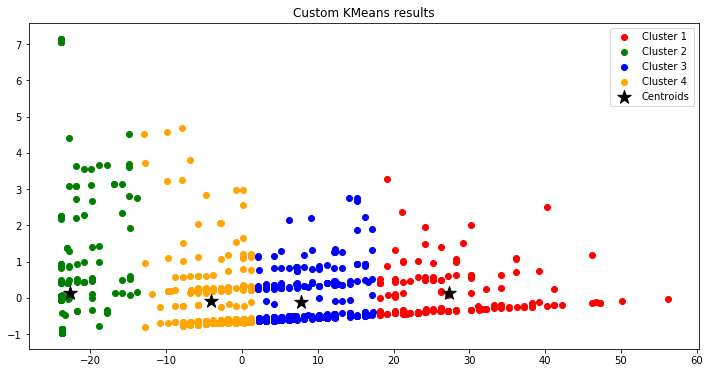

This experiment took: 2.4999210834503174 seconds with custom algorithm


In [272]:
import time

plot_colors = ['red', 'green', 'blue', 'orange', 'yellow']
start = time.time()
for i in range(1, 5):
    test = KMeans_numpy(n_clusters=i, tolerance=0.00001)
    clust, clust_data = test.fit(reduced_features)
    clust = np.array(clust)
    plt.figure(figsize=(12, 6))
    for key in clust_data.keys():
        plt.scatter(np.array(clust_data[key])[:, 0], np.array(clust_data[key])[:, 1], color=plot_colors[key], label='Cluster {}'.format(key+1))
    
    plt.scatter(clust[:, 0], clust[:, 1], marker='*', s=200, color='black', label='Centroids')
    plt.title("Custom KMeans results")
    plt.legend()
    plt.show()
    
end = time.time()
print("This experiment took: {} seconds with custom algorithm".format(end-start))

As we can see on this dataset we can see that 2 clusters are enough. There is another method to determine how many clusters do we really need it is called Elbow Method.

The idea behind the Elbow Method is to find that number of clusters where distorsion between cluster starts to increase most rapidly. For that we can use sklearn method KMeans.inertia_.

### Elbow Method

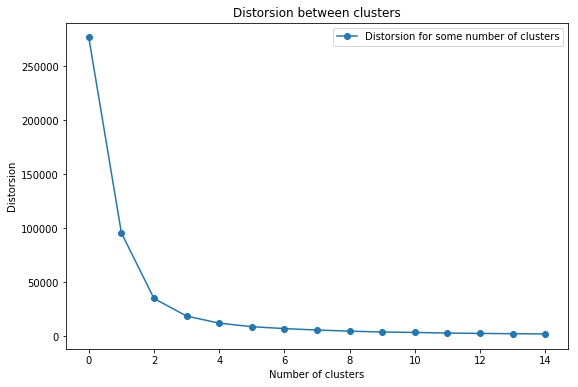

In [273]:
cluster_distorsion = []
for i in range(1, 16):
    test_sklearn = KMeans(n_clusters=i)
    test_sklearn.fit(reduced_features)
    cluster_distorsion.append(test_sklearn.inertia_)
plt.figure(figsize=(9, 6))
plt.plot(cluster_distorsion, marker='o', label='Distorsion for some number of clusters')
plt.title("Distorsion between clusters")
plt.xlabel('Number of clusters')
plt.ylabel("Distorsion")
plt.legend()
plt.show()

### Mean Shift 

In [274]:
from sklearn.cluster import MeanShift

In [275]:
mean_shift_sklearn = MeanShift(bandwidth=6.5)

In [276]:
clust = mean_shift_sklearn.fit(reduced_features)

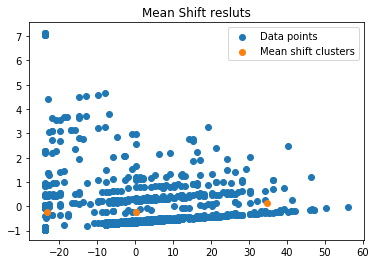

In [277]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], label='Data points')
plt.scatter(clust.cluster_centers_[:, 0], clust.cluster_centers_[:, 1], label='Mean shift clusters')
plt.title("Mean Shift resluts")
plt.legend()
plt.show()

## Inspecting data from Custom KMeans (n_clusters=4)

First what we have to do is to put normal data not PCA data into KMeans. In this case we wont use PCA because we want to analyse clusters.

In [278]:
inspect_kmeans = KMeans_numpy(n_clusters=4, tolerance=0.00001)

In [279]:
clust, clust_data = inspect_kmeans.fit(features)

C:\Users\mndeh\Desktop\Clustering Notebooks\clustering-python-master\Titanic Kaggle Clustering\kmeans_numpy.py:60: RuntimeWarning: divide by zero encountered in true_divide
  if np.sum((current_centroid - original_centroid)/original_centroid*100.0) > self.tol:


In [280]:
cluster_one_dataFrame = pd.DataFrame(clust_data[0], columns=['Survived', 'Class', 'Sex', 'Age', 'SibSp', 'Parch'])
cluster_two_dataFrame = pd.DataFrame(clust_data[1], columns=['Survived', 'Class', 'Sex', 'Age', 'SibSp', 'Parch'])
cluster_three_dataFrame = pd.DataFrame(clust_data[2], columns=['Survived', 'Class', 'Sex', 'Age', 'SibSp', 'Parch'])
cluster_four_dataFrame = pd.DataFrame(clust_data[3], columns=['Survived', 'Class', 'Sex', 'Age', 'SibSp', 'Parch'])

### First cluster analysis

In [281]:
women_survived = cluster_one_dataFrame.loc[(cluster_one_dataFrame['Survived'] == 1.0)]
women_survived = women_survived.loc[(women_survived['Sex'] == 0.0)]

In [282]:
print("First cluster: 102 survived from that {} women and rest men.".format(women_survived.shape[0]))

First cluster: 102 survived from that 71 women and rest men.


In [283]:
first_class_woman = women_survived.loc[(women_survived['Class'] == 1.0)]
second_class_woman = women_survived.loc[(women_survived['Class'] == 2.0)]
print("First cluster: 76 woman survived from that {} FIRST class, {} second class and rest third.".format(first_class_woman.shape[0], second_class_woman.shape[0]))

First cluster: 76 woman survived from that 33 FIRST class, 30 second class and rest third.


In [284]:
parant_woman_first_class = first_class_woman.loc[(first_class_woman['Parch'] == 1.0)]
second_woman_first_class = second_class_woman.loc[(second_class_woman['Parch'] == 1.0)]

In [285]:
parant_woman_first_class

,Survived,Class,Sex,Age,SibSp,Parch
88,1.0,1.0,0.0,40.0,1.0,1.0
156,1.0,1.0,0.0,39.0,1.0,1.0
166,1.0,1.0,0.0,39.0,1.0,1.0
219,1.0,1.0,0.0,43.0,0.0,1.0
237,1.0,1.0,0.0,39.0,1.0,1.0


In [286]:
second_woman_first_class

,Survived,Class,Sex,Age,SibSp,Parch
24,1.0,2.0,0.0,34.0,0.0,1.0
75,1.0,2.0,0.0,41.0,0.0,1.0
118,1.0,2.0,0.0,34.0,1.0,1.0
189,1.0,2.0,0.0,40.0,1.0,1.0
226,1.0,2.0,0.0,31.0,1.0,1.0


Men survivers:

In [287]:
print("From the first cluster {} men survived.".format(102 - women_survived.shape[0]))

From the first cluster 31 men survived.


In [288]:
men_first_class = cluster_one_dataFrame.loc[(cluster_one_dataFrame['Survived'] == 1.0)]
men_first_class = men_first_class.loc[(men_first_class['Sex'] == 1.0)]
men_first_class_survived = men_first_class.loc[(men_first_class['Class'] == 1.0)]
men_second_class_survived = men_first_class.loc[(men_first_class['Class'] == 2.0)]
print("Men from the first class survied: {}".format(men_first_class_survived.shape[0]))
print("Men from the second class survied: {}".format(men_second_class_survived.shape[0]))

Men from the first class survied: 17
Men from the second class survied: 4


### Second cluster analysis

In [289]:
women_survived = cluster_two_dataFrame.loc[(cluster_two_dataFrame['Survived'] == 1.0)]
women_survived = women_survived.loc[(women_survived['Sex'] == 0.0)]

In [290]:
print("Second cluster: {} survived from that {} women and rest men.".format(cluster_two_dataFrame.loc[(cluster_two_dataFrame['Survived'] == 1.0)].shape[0], women_survived.shape[0]))

Second cluster: 91 survived from that 55 women and rest men.


In [291]:
first_class_woman = women_survived.loc[(women_survived['Class'] == 1.0)]
second_class_woman = women_survived.loc[(women_survived['Class'] == 2.0)]
print("First cluster: 71 woman survived from that {} FIRST class, {} second class and rest third.".format(first_class_woman.shape[0], second_class_woman.shape[0]))

First cluster: 71 woman survived from that 9 FIRST class, 10 second class and rest third.


In [292]:
parant_woman_first_class = first_class_woman.loc[(first_class_woman['Parch'] == 1.0)]
second_woman_first_class = second_class_woman.loc[(second_class_woman['Parch'] == 1.0)]

In [293]:
parant_woman_first_class

,Survived,Class,Sex,Age,SibSp,Parch
46,1.0,1.0,0.0,0.0,0.0,1.0


In [294]:
second_woman_first_class

,Survived,Class,Sex,Age,SibSp,Parch
149,1.0,2.0,0.0,2.0,1.0,1.0
176,1.0,2.0,0.0,4.0,2.0,1.0
198,1.0,2.0,0.0,6.0,0.0,1.0
205,1.0,2.0,0.0,4.0,1.0,1.0


Men survivers:

In [295]:
print("From the first cluster {} men survived.".format(103 - women_survived.shape[0]))

From the first cluster 48 men survived.


In [296]:
men_first_class = cluster_two_dataFrame.loc[(cluster_two_dataFrame['Survived'] == 1.0)]
men_first_class = men_first_class.loc[(men_first_class['Sex'] == 1.0)]
men_first_class_survived = men_first_class.loc[(men_first_class['Class'] == 1.0)]
men_second_class_survived = men_first_class.loc[(men_first_class['Class'] == 2.0)]
print("Men from the first class survied: {}".format(men_first_class_survived.shape[0]))
print("Men from the second class survied: {}".format(men_second_class_survived.shape[0]))

Men from the first class survied: 8
Men from the second class survied: 11


### Third cluster analysis

In [297]:
women_survived = cluster_three_dataFrame.loc[(cluster_three_dataFrame['Survived'] == 1.0)]
women_survived = women_survived.loc[(women_survived['Sex'] == 0.0)]

In [298]:
print("Second cluster: {} survived from that {} women and rest men.".format(cluster_three_dataFrame.loc[(cluster_three_dataFrame['Survived'] == 1.0)].shape[0], women_survived.shape[0]))

Second cluster: 46 survived from that 31 women and rest men.


In [299]:
first_class_woman = women_survived.loc[(women_survived['Class'] == 1.0)]
second_class_woman = women_survived.loc[(women_survived['Class'] == 2.0)]
print("First cluster: 31 woman survived from that {} FIRST class, {} second class and rest third.".format(first_class_woman.shape[0], second_class_woman.shape[0]))

First cluster: 31 woman survived from that 22 FIRST class, 8 second class and rest third.


In [300]:
parant_woman_first_class = first_class_woman.loc[(first_class_woman['Parch'] == 1.0)]
second_woman_first_class = second_class_woman.loc[(second_class_woman['Parch'] == 1.0)]

In [301]:
parant_woman_first_class

,Survived,Class,Sex,Age,SibSp,Parch
35,1.0,1.0,0.0,58.0,0.0,1.0
39,1.0,1.0,0.0,50.0,0.0,1.0
69,1.0,1.0,0.0,44.0,0.0,1.0
114,1.0,1.0,0.0,52.0,1.0,1.0
118,1.0,1.0,0.0,45.0,1.0,1.0
121,1.0,1.0,0.0,47.0,1.0,1.0
123,1.0,1.0,0.0,56.0,0.0,1.0


In [302]:
second_woman_first_class

,Survived,Class,Sex,Age,SibSp,Parch
33,1.0,2.0,0.0,50.0,0.0,1.0
52,1.0,2.0,0.0,45.0,1.0,1.0


Men survivers:

In [303]:
print("From the first cluster {} men survived.".format(46 - women_survived.shape[0]))

From the first cluster 15 men survived.


In [304]:
men_first_class = cluster_three_dataFrame.loc[(cluster_three_dataFrame['Survived'] == 1.0)]
men_first_class = men_first_class.loc[(men_first_class['Sex'] == 1.0)]
men_first_class_survived = men_first_class.loc[(men_first_class['Class'] == 1.0)]
men_second_class_survived = men_first_class.loc[(men_first_class['Class'] == 2.0)]
print("Men from the first class survied: {}".format(men_first_class_survived.shape[0]))
print("Men from the second class survied: {}".format(men_second_class_survived.shape[0]))

Men from the first class survied: 12
Men from the second class survied: 1


### Fourth cluster analysis

In [305]:
women_survived = cluster_four_dataFrame.loc[(cluster_four_dataFrame['Survived'] == 1.0)]
women_survived = women_survived.loc[(women_survived['Sex'] == 0.0)]

In [306]:
print("Second cluster: {} survived from that {} women and rest men.".format(cluster_four_dataFrame.loc[(cluster_four_dataFrame['Survived'] == 1.0)].shape[0], women_survived.shape[0]))

Second cluster: 102 survived from that 76 women and rest men.


In [307]:
first_class_woman = women_survived.loc[(women_survived['Class'] == 1.0)]
second_class_woman = women_survived.loc[(women_survived['Class'] == 2.0)]
print("First cluster: 55 woman survived from that {} FIRST class, {} second class and rest third.".format(first_class_woman.shape[0], second_class_woman.shape[0]))

First cluster: 55 woman survived from that 27 FIRST class, 22 second class and rest third.


In [308]:
parant_woman_first_class = first_class_woman.loc[(first_class_woman['Parch'] == 1.0)]
second_woman_first_class = second_class_woman.loc[(second_class_woman['Parch'] == 1.0)]

In [309]:
parant_woman_first_class

,Survived,Class,Sex,Age,SibSp,Parch
103,1.0,1.0,0.0,16.0,0.0,1.0
111,1.0,1.0,0.0,22.0,0.0,1.0
206,1.0,1.0,0.0,15.0,0.0,1.0
253,1.0,1.0,0.0,16.0,0.0,1.0


In [310]:
second_woman_first_class

,Survived,Class,Sex,Age,SibSp,Parch
102,1.0,2.0,0.0,22.0,1.0,1.0
142,1.0,2.0,0.0,13.0,0.0,1.0
170,1.0,2.0,0.0,25.0,1.0,1.0
173,1.0,2.0,0.0,24.0,2.0,1.0
189,1.0,2.0,0.0,18.0,0.0,1.0
263,1.0,2.0,0.0,25.0,0.0,1.0


Men survivers:

In [311]:
print("From the first cluster {} men survived.".format(91 - women_survived.shape[0]))

From the first cluster 15 men survived.


In [312]:
men_first_class = cluster_four_dataFrame.loc[(cluster_four_dataFrame['Survived'] == 1.0)]
men_first_class = men_first_class.loc[(men_first_class['Sex'] == 1.0)]
men_first_class_survived = men_first_class.loc[(men_first_class['Class'] == 1.0)]
men_second_class_survived = men_first_class.loc[(men_first_class['Class'] == 2.0)]
print("Men from the first class survied: {}".format(men_first_class_survived.shape[0]))
print("Men from the second class survied: {}".format(men_second_class_survived.shape[0]))

Men from the first class survied: 8
Men from the second class survied: 1


### Conclusion:

We have got very interesting resluts buy analysing clusters. As we know the most survivers were women and as we can see not majority was from first and second class. There are a lot survivers from class three as well.

If you are interested I am sure that we can find many interesting information from people who weren't lucky to survive.